In [33]:
import keras
from keras.datasets import mnist

# load and split the MNIST digits dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [34]:
print(x_train.shape, "Training shape")
print(x_test.shape, "Testing shape")



(60000, 28, 28) Training shape
(10000, 28, 28) Testing shape


Text(0.5, 1.0, 'Pixel Value Distribution')

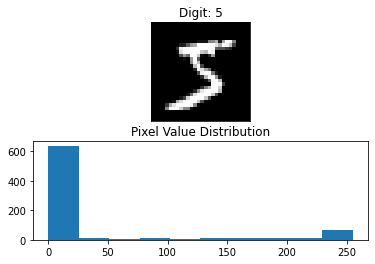

In [35]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(x_train[0].reshape(784))
plt.title('Pixel Value Distribution')

In [36]:
#reshape and normalize data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train /255
x_test = x_test /255

# print the final input shape ready for training
print("Train matrix shape", x_train.shape)
print("Test matrix shape", x_test.shape)

 

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [37]:
# convert class vectors to binary class matrices
print("Shape before one-hot encoding: ", y_train[0])
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

print("Shape after one-hot encodint: ", y_train[0])


Shape before one-hot encoding:  5
Shape after one-hot encodint:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [38]:
batch_size = 128
num_classes = 10
epochs = 20
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [39]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, 
                    validation_data=(x_test, y_test))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


469/469 [==============================] - 5s 10ms/step - loss: 0.4546 - accuracy: 0.8769 - val_loss: 0.2633 - val_accuracy: 0.9282
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2437 - accuracy: 0.9316 - val_loss: 0.2092 - val_accuracy: 0.9417
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1934 - accuracy: 0.9454 - val_loss: 0.1747 - val_accuracy: 0.9514
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1609 - accuracy: 0.9550 - val_loss: 0.1471 - val_accuracy: 0.9575
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1378 - accuracy: 0.9622 - val_loss: 0.1303 - val_accuracy: 0.9630
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1210 - accuracy: 0.9667 - val_loss: 0.1201 - val_accuracy: 0.9647
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1078 - accuracy: 0.9701 - val_loss: 0.1090 - val_accuracy: 0.9691
Epoch 8/20
469

In [40]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06815548986196518
Test accuracy: 0.978600025177002


In [41]:
import os
# saving the model
save_dir = "results/"
model_name = 'keras_mnist_mlp.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at results/keras_mnist_mlp.h5 
